## Introdução ao mlflow
FLuxo Convencional do ciclo de vida do ML

Entendimento do problema.
A imobiliaria Horizonte busca uma solução para sua precificação de imoveis, que atualmente é lenta e incosistente. Para resolver isso, nosso objetivo é cotntruir um modelo de regresssao, um tipode de aprendizado de maquina supervisionado, que funcione como um 'avaliador virtual'.  Usaremos um conjunto de dados historicos, contendo as caracteristicas dos imoveis e seus preços de venda, para treinar este sistema. O modelo final devrá ser capaz de analisar as informações de uma prorpiedade novam que ele nunca iu antes, e estimar seu valor de mercado de forma instantanea e precisa, resolvendo o desafio de negocio da imobiliária



In [ ]:
!pip install mlflow scikit-learn pandas numpy matplotlib seaborn ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.1/329.1 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

#Carregar o conjunto de dados
california_housing = fetch_california_housing(as_frame=True)

#Criar um DataFrame com os dados
df = california_housing.frame

#Exibir as primeiras linhas
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## EDA

informações do dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
/nResumo estatistico:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.

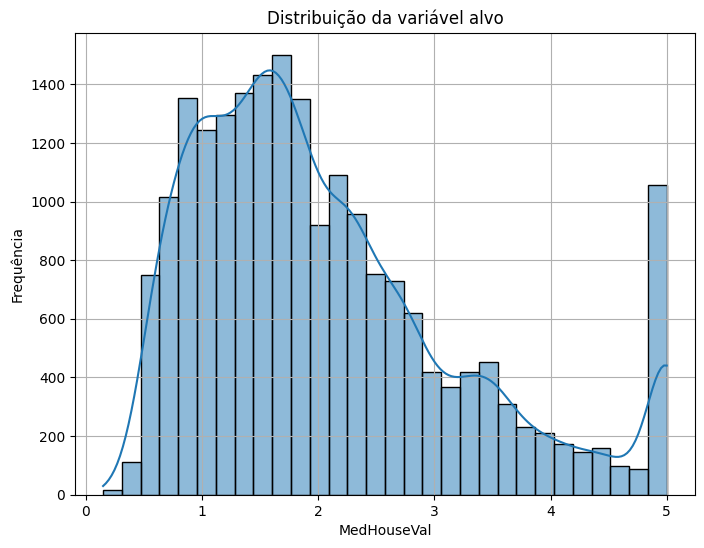

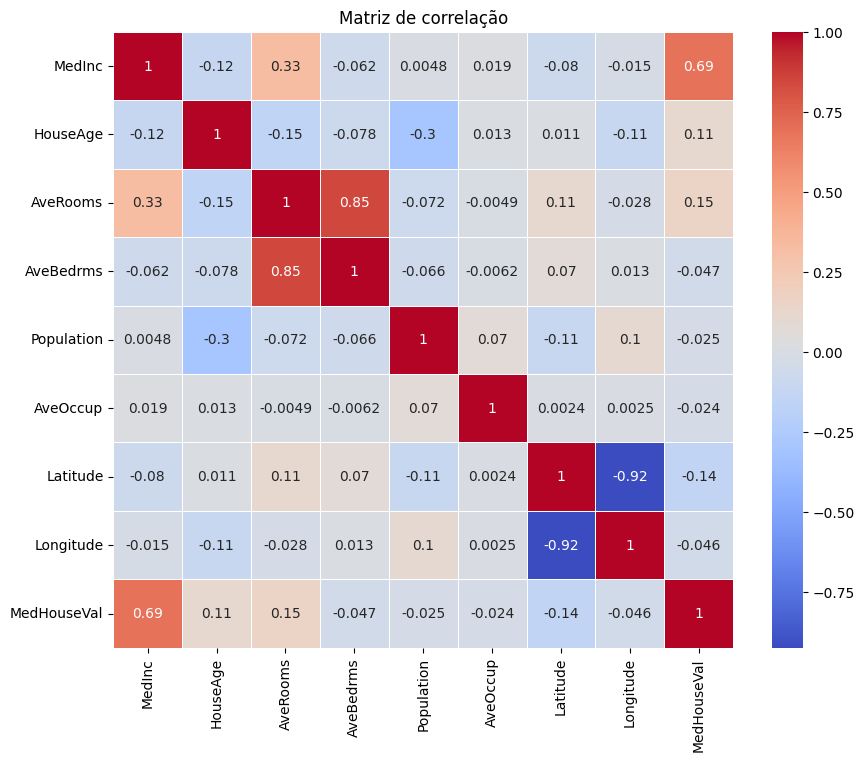

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Informações basicas sobre o dataframe
print('informações do dataframe')
df.info()

#Resumo estatistico
print ('/nResumo estatistico:')
print(df.describe())
#Visualizar a distribuição da variável alvo (MedHouseVal)
plt.figure(figsize=(8, 6))
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.title('Distribuição da variável alvo')
plt.xlabel('MedHouseVal')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

#Matriz de correlação para entender a relações entre as variaveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlação')
plt.show()

## EDA automatizada

In [ ]:
from ydata_profiling import ProfileReport
#Generate the profile
profile = ProfileReport(df, title = 'California Housing EDA', explorative = True)

#Save the report as a HTML file
profile.to_file('california_housing_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 26.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Limpeza e preparação dos dados (data cleaning)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separar variaveis (X) e (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

#Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Padronizar as caracteristicas (features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train.shape), print(X_test.shape)

(16512, 8)
(4128, 8)


(None, None)

## Treinamento


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

0.5051432839771741
0.8052747336256919


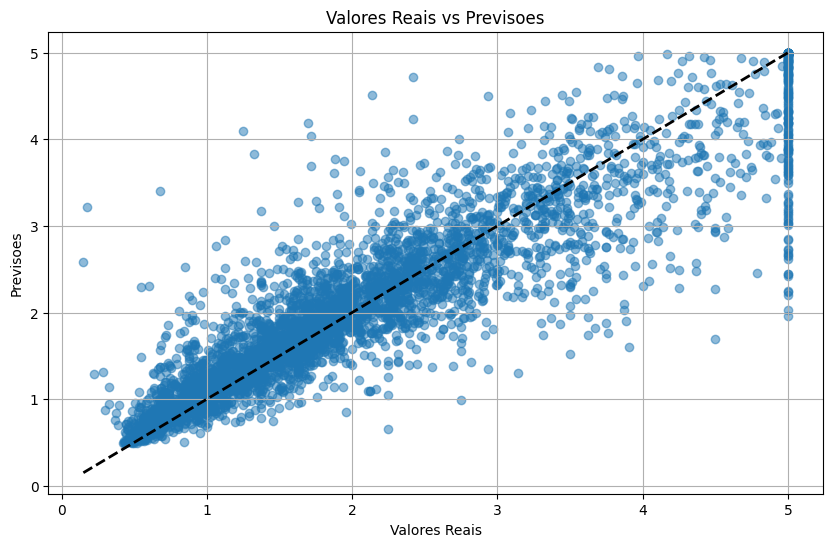

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
#Fazer previsoes no conjunto de teste
y_pred = model.predict(X_test_scaled)
#Calcular as metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(rmse)
print(r2)

#Visualizar as previoes vs valores reais
plt.figure(figsize = (10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsoes')
plt.title('Valores Reais vs Previsoes')
plt.grid(True)
plt.show()



## Deploy - uso em produção


In [ ]:
#Pegar 5 observações do conjunto de dados eque nao foram usadas para treino
novas_observações = X_test.head(5)
print('Novas Obserações (dados brutos)')
print(novas_observações)

#Pré-processar essas observações usando o mesmo scaler
novas_observações_scaled = scaler.transform(novas_observações)
#print('Novas Observações (dados pré-processados)')
#print(novas_observações_scaled)

privoses_finais = model.predict(novas_observações_scaled)
print('Previsões finais')
print(privoses_finais)
#Cria um dataframe para uma melhor visulização
df_resultados = pd.DataFrame({
    'Valor Real': y_test.head(5).values,
    'Previsão': privoses_finais
})

#Lembre-se que os valores estao em centanas de milhares de dolares
df_resultados['Valor Real ($)'] = df_resultados['Valor Real'] * 100000
df_resultados['Previsão ($)'] = df_resultados['Previsão'] * 100000
df_resultados

Novas Obserações (dados brutos)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   
3024   2.5313      30.0  5.039384   1.193493      1565.0  2.679795     35.14   
15663  3.4801      52.0  3.977155   1.185877      1310.0  1.360332     37.80   
20484  5.7376      17.0  6.163636   1.020202      1705.0  3.444444     34.28   
9814   3.7250      34.0  5.492991   1.028037      1063.0  2.483645     36.62   

       Longitude  
20046    -119.01  
3024     -119.46  
15663    -122.44  
20484    -118.72  
9814     -121.93  
Previsões finais
[0.5095    0.74161   4.9232571 2.52961   2.27369  ]


,Valor Real,Previsão,Valor Real ($),Previsão ($)
0,0.47700,0.509500,47700.0,50950.00
1,0.45800,0.741610,45800.0,74161.00
2,5.00001,4.923257,500001.0,492325.71
3,2.18600,2.529610,218600.0,252961.00
4,2.78000,2.273690,278000.0,227369.00


## Ciclo de Vida Orquestrado pelo MLflow


In [ ]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess # Para eucatar o cloudflare em segundo plano
import threading #Para gerenciar o preocesso do cloudfared
import time


### Rastreamento de experimentos com MLflow tracking


In [ ]:
# Definindo o nome do experimento
experiment_name = "Regressao_CaliforniaHousing_RandomForest"
mlflow.set_experiment(experiment_name)

# Início de uma nova run
with mlflow.start_run(run_name="primeira_run_rf_regressor"):
    # 5.1. Parâmetros
    n_estimators = 100
    max_depth = 10
    random_state = 42

    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("random_state", random_state)

    print(f"Parâmetros logados: n_estimators={n_estimators}, max_depth={max_depth}")

    # 5.2. Treinamento do Modelo (RandomForestRegressor)
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    model.fit(X_train, y_train)

    # 5.3. Previsões e Métricas (para Regressão)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)

    print(f"\nMétricas logadas: RMSE={rmse:.4f}, R2 Score={r2:.4f}")

    # 5.4. Armazenamento de Artefatos (Gráficos)
    # Exemplo: Plotar e salvar um gráfico de dispersão das previsões vs. real
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Valor Real")
    plt.ylabel("Valor Previsto")
    plt.title("Previsões vs. Valores Reais")
    plt.savefig("predictions_vs_actual.png")
    mlflow.log_artifact("predictions_vs_actual.png")
    print("Gráfico de Previsões vs. Reais salvo como artefato.")
    plt.close() # Fecha a figura para não exibir no output do Colab

    # 5.5. Registro do Modelo
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="random_forest_regressor_model",
        registered_model_name="RandomForestRegressorModel", # Este nome será usado para registrar no Model Registry
        signature=mlflow.models.signature.infer_signature(X_train, model.predict(X_train)),
        input_example=X_train.head(2) # Exemplo de entrada para o modelo
    )
    print("Modelo logado e registrado no Model Registry.")

print("\nPara visualizar a UI do MLflow, execute: !mlflow ui")
print("No Google Colab, para acessar a UI, você precisará usar ngrok ou uma abordagem similar.")
print("Para fins de demonstração local no Colab, o MLflow cria uma pasta 'mlruns' que contém os logs.")

2025/10/15 20:52:22 INFO mlflow.tracking.fluent: Experiment with name 'Regressao_CaliforniaHousing_RandomForest' does not exist. Creating a new experiment.


Parâmetros logados: n_estimators=100, max_depth=10

Métricas logadas: RMSE=0.5445, R2 Score=0.7737
Gráfico de Previsões vs. Reais salvo como artefato.


2025/10/15 20:52:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Modelo logado e registrado no Model Registry.

Para visualizar a UI do MLflow, execute: !mlflow ui
No Google Colab, para acessar a UI, você precisará usar ngrok ou uma abordagem similar.
Para fins de demonstração local no Colab, o MLflow cria uma pasta 'mlruns' que contém os logs.


Successfully registered model 'RandomForestRegressorModel'.
Created version '1' of model 'RandomForestRegressorModel'.


## Realizando uma segunda run (exemplo de compração)


In [ ]:
with mlflow.start_run(run_name="segunda_run_rf_regressor_otimizado"):
    n_estimators_new = 150
    max_depth_new = 15

    mlflow.log_param("n_estimators", n_estimators_new)
    mlflow.log_param("max_depth", max_depth_new)
    mlflow.log_param("random_state", random_state) # Mantendo o mesmo random_state

    print(f"\nParâmetros logados para a segunda run: n_estimators={n_estimators_new}, max_depth={max_depth_new}")

    model_new = RandomForestRegressor(n_estimators=n_estimators_new, max_depth=max_depth_new, random_state=random_state)
    model_new.fit(X_train, y_train)

    y_pred_new = model_new.predict(X_test)

    rmse_new = np.sqrt(mean_squared_error(y_test, y_pred_new))
    r2_new = r2_score(y_test, y_pred_new)

    mlflow.log_metric("rmse", rmse_new)
    mlflow.log_metric("r2_score", r2_new)

    print(f"Métricas logadas para a segunda run: RMSE={rmse_new:.4f}, R2 Score={r2_new:.4f}")

    # Exemplo: Plotar e salvar um gráfico de dispersão das previsões vs. real
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Valor Real")
    plt.ylabel("Valor Previsto")
    plt.title("Previsões vs. Valores Reais Run 2")
    plt.savefig("predictions_vs_actual_v2.png")
    mlflow.log_artifact("predictions_vs_actual_v2.png")
    print("Gráfico de Previsões vs. Reais salvo como artefato v2.")
    plt.close() # Fecha a figura para não exibir no output do Colab

    # Não vamos registrar novamente o modelo no Model Registry nesta run, apenas logá-lo como um artefato
    mlflow.sklearn.log_model(
        sk_model=model_new,
        artifact_path="random_forest_regressor_model_otimizado",
        registered_model_name="RandomForestRegressorModel",
        signature=mlflow.models.signature.infer_signature(X_train, model_new.predict(X_train)),
        input_example=X_train.head(2)
    )
    print("Segundo modelo logado como artefato.")


Parâmetros logados para a segunda run: n_estimators=150, max_depth=15
Métricas logadas para a segunda run: RMSE=0.5100, R2 Score=0.8015
Gráfico de Previsões vs. Reais salvo como artefato v2.


2025/10/15 20:53:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Segundo modelo logado como artefato.


Registered model 'RandomForestRegressorModel' already exists. Creating a new version of this model...
Created version '2' of model 'RandomForestRegressorModel'.


## Acessando o MLFlow Model Registry e Carregando o modelo


In [ ]:
# Listar modelos registrados (se houver)
print("\nModelos registrados no MLflow Model Registry:")
client = mlflow.tracking.MlflowClient()
model_name = "RandomForestRegressorModel" # Nome do modelo registrado

try:
    for mv in client.search_model_versions(f"name='{model_name}'"):
        print(f"  Versão: {mv.version}, Status: {mv.status}, Stage: {mv.current_stage}")

    # Carregar a última versão do modelo registrado
    # Usar a função search_model_versions para encontrar a versão mais recente
    # Nota: Em um ambiente de produção, você pode querer carregar uma versão específica ou um estágio específico (e.g., "Production")
    latest_version = client.get_latest_versions(model_name, stages=["None"])
    if latest_version:
        latest_version_number = latest_version[0].version
        print(f"\nCarregando a última versão ({latest_version_number}) do modelo '{model_name}'...")
        loaded_model = mlflow.sklearn.load_model(f"models:/{model_name}/{latest_version_number}")
        print("Modelo carregado com sucesso!")
    else:
        print(f"Nenhuma versão do modelo '{model_name}' encontrada. Certifique-se de que o modelo foi registrado.")
        loaded_model = None
except Exception as e:
    print(f"Erro ao acessar o Model Registry: {e}")
    print("Pode ser que o modelo ainda não tenha sido registrado na primeira run.")
    loaded_model = None


Modelos registrados no MLflow Model Registry:
  Versão: 2, Status: READY, Stage: None
  Versão: 1, Status: READY, Stage: None

Carregando a última versão (2) do modelo 'RandomForestRegressorModel'...
Modelo carregado com sucesso!


/tmp/ipython-input-1063474378.py:13: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest_version = client.get_latest_versions(model_name, stages=["None"])


## Realizando inferencia com o modelo registrado

In [ ]:
if loaded_model:
    print("\nRealizando inferência com o modelo carregado...")
    # Gerando novos dados para inferência com as mesmas colunas do X_train
    new_data = pd.DataFrame({
        'MedInc': [6.0, 3.5, 8.0],
        'HouseAge': [30.0, 15.0, 50.0],
        'AveRooms': [6.0, 4.0, 9.0],
        'AveBedrms': [1.0, 0.8, 1.5],
        'Population': [1500.0, 800.0, 2500.0],
        'AveOccup': [3.0, 2.5, 4.0],
        'Latitude': [34.0, 37.0, 33.0],
        'Longitude': [-118.0, -122.0, -117.0]
    })

    print("\nNovos dados para inferência:")
    print(new_data)

    predictions = loaded_model.predict(new_data)

    print("\nPrevisões (valores medianos de casas):")
    print(predictions)
else:
    print("\nNão foi possível carregar o modelo para inferência.")


Realizando inferência com o modelo carregado...

Novos dados para inferência:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     6.0      30.0       6.0        1.0      1500.0       3.0      34.0   
1     3.5      15.0       4.0        0.8       800.0       2.5      37.0   
2     8.0      50.0       9.0        1.5      2500.0       4.0      33.0   

   Longitude  
0     -118.0  
1     -122.0  
2     -117.0  

Previsões (valores medianos de casas):
[2.85114308 2.19195944 4.21383647]


Esse comando baixa e instala o Cloudflared, que é um daemon do Cloudflare Tunnel. Ele permite criar um túnel seguro do seu ambiente Colab para a rede do Cloudflare, o que é útil para expor serviços locais (como a UI do MLflow) à internet de forma segura, sem a necessidade de abrir portas no seu firewall.

In [ ]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

--2025-10-15 20:54:59--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.10.0/cloudflared-linux-amd64.deb [following]
--2025-10-15 20:55:00--  https://github.com/cloudflare/cloudflared/releases/download/2025.10.0/cloudflared-linux-amd64.deb
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/c421f730-02a9-4b1f-bd27-4c5dd6645f82?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-10-15T21%3A44%3A56Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64.deb&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4d

In [ ]:
#Prta em que o MLflow UI sera executado
MLFLOW_PORT = 5000
#Função para iniciar o MLflow UI em segundo plano:
def run_mlflow_ui():
  print(f'Iniciando MLFlow UI na porta { MLFLOW_PORT} ...')
  # O comando 'mlflow ui' iniciará o servidor. O '&' o coloca em segundo plano.
  # Redirecionamos a saida para um arquivo log para nao poluir o output do Colab.
  subprocess.run(f'mlflow ui --port {MLFLOW_PORT} > mlflow_ui.log 2>%1 &', shell = True)
  print(f'MLflow UI iniciado. Aguardado para estabelecer o tunel ...')
#Iniciar o mlflow Ui em uma thread separada para nao bloquear o notebook
mlflow_thread = threading.Thread(target = run_mlflow_ui)
mlflow_thread.start()
#Dar um tempo p mlflow iniciar
time.sleep(7)
#iniciar o cloudflare tunnel para a porta do mlflow
print(f"\nIniciando Cloudflare Tunnel para hhtp://localhost:{MLFLOW_PORT}...")
try:
  # O comando 'cloudflared tunnel --url hhtp://localhost:PORTA'
  # cria um tunel temporario e imprime a URL pública.
  #Usamos Popen para capturar a saida em tempo real
  process = subprocess.Popen(
      ['cloudflared', 'tunnel', '--url', f'http://localhost:{MLFLOW_PORT}'],
      stdout=subprocess.PIPE,
      stderr=subprocess.STDOUT,
      text = True
  )
  public_url = None
  #Lendo a saida do processo para encontrar a URL
  for line in process.stdout:
    print(line, end = '') #imprime a saida do cloudflared no colab
    if 'https://' in line and '.trycloudflare.com' in line:
      public_url = line.strip().split("https://")[1].split(" ")[0] # Extrai a URL
      print(f"\nMLflow UI está acessível em: https://{public_url}")
      print("Copie e cole esta URL no seu navegador.")
      break # Parar de ler após encontrar a URL

  if not public_url:
    print("Não foi possível obter a URL pública do Cloudflare Tunnel. Verifique os logs acima para erros.")
    # Se não encontrarmos a URL em um tempo razoável, podemos parar o processo
    process.terminate()

    # O processo `cloudflared` continuará rodando em segundo plano.
    # Para interrompê-lo, você precisaria reiniciar o ambiente de execução do Colab
    # ou encontrar o PID do processo e usar `kill`.
    # Para manter o notebook simples, não adicionaremos a lógica de kill aqui.

except Exception as e:
  print(f"Erro ao iniciar o Cloudflare Tunnel: {e}")
  print("Verifique se o `cloudflared` foi instalado corretamente.")

Iniciando MLFlow UI na porta 5000 ...
MLflow UI iniciado. Aguardado para estabelecer o tunel ...

Iniciando Cloudflare Tunnel para hhtp://localhost:5000...
2025-10-15T21:15:29Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-10-15T21:15:29Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-10-15T21:15:33Z INF +--------------------------------------------------------------------------------------------+
2025-10-15T21:15:33Z INF |  Your quick Tunnel